# But prise en main des objets créés par mes collègues et lancement d'un entrapînement à partir de la BDTOPO ou du RIL en tant que LAbel ??

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
! pip install rasterio  -q -q -q
! pip install geopandas -q -q -q
! pip install matplotlib -q -q -q
! pip install torch


In [3]:
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 11.7 MB/s eta 0:00:0000:0100:01


In [4]:
import sys
from datetime import *
from classes.data.satellite_image import *
from utils.utils import *


In [5]:
import yaml
import re
import s3fs
import numpy as np
import matplotlib.pyplot as plt

In [6]:
update_storage_access()

In [7]:
environment = get_environment()

root_path = get_root_path()
bucket = environment["bucket"]

bucket = environment["bucket"]

path_s3_pleiades_datam = environment["sources"]["PLEIADES"][2022]["972"]
path_s3_pleiades_data = environment["sources"]["PLEIADES"][2022]["973"]
path_s3_sentinel2_data = environment["sources"]["SENTINEL2"][2022]["971"]
path_local_sentinel2_data = environment["local-path"]["SENTINEL2"][2022]["971"]
path_s3_bdtopo_data = environment["sources"]["BDTOPO"][2022]["973"]
path_local_pleiades_datam = environment["local-path"]["PLEIADES"][2022]["972"]
path_local_pleiades_data = environment["local-path"]["PLEIADES"][2022]["973"]
path_local_bdtopo_data = environment["local-path"]["BDTOPO"][2022]["973"]


fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})

In [8]:
# DL PLEIADE
fs.download(
        rpath=f"{bucket}/{path_s3_pleiades_data}",
        lpath=f"../{path_local_pleiades_data}",
        recursive=True)
#fs.download(
        #rpath=f"{bucket}/{path_s3_pleiades_datam}",
        #lpath=f"../{path_local_pleiades_datam}",
        #recursive=True)

In [ ]:
# DL BDTOPO
#fs.download(
        #rpath=f"{bucket}/{path_s3_bdtopo_data}",
        #lpath=f"../{path_local_bdtopo_data}",
        #recursive=True)

In [ ]:
# DL Sentinel2
#fs.download(
        #rpath=f"{bucket}/{path_s3_sentinel2_data}",
        #lpath=f"../{path_local_sentinel2_data}",
        #recursive=True)

## Chargement données pleiades

In [9]:
filename = '../data/PLEIADES/2022/GUYANE/ORT_2022072050325085_0353_0545_U22N_16Bits.jp2'
date = datetime.strptime(re.search(r'ORT_(\d{8})', filename).group(1), '%Y%m%d')
date

datetime.datetime(2022, 7, 20, 0, 0)

In [10]:
date

datetime.datetime(2022, 7, 20, 0, 0)

In [11]:
im_dir = "../data/PLEIADES/2022/GUYANE/"
liste  = os.listdir(im_dir)
list_path_image = np.array([im_dir+l for l in liste])


liste_globale_image = [ SatelliteImage.from_raster(
        filename,
        date = date, 
        n_bands = 3,
        dep = "973"
    ) for filename in list_path_image]


In [ ]:
im_dir = "../data/PLEIADES/2022/MARTINIQUE/"
liste  = os.listdir(im_dir)
list_path_image = np.array([im_dir+l for l in liste])


liste_globale_image_m = [ SatelliteImage.from_raster(
        filename,
        date = date, 
        n_bands = 3,
        dep = "972"
    ) for filename in list_path_image]

## BD TOPO

In [12]:
from classes.labelers.labeler import BDTOPOLabeler

In [13]:

#labeler_bdtopo_mar = BDTOPOLabeler(date, dep = "972")
labeler_bdtopo_guy = BDTOPOLabeler(date, dep = "973")# charghement lenbt nécessite d'avoir downloader la BDTOPO avant. fluidifier ça ?

download 973 2022 in /home/onyxia/work/detection-habitat-spontane-consommation-espace/data/BDTOPO/2022/BDTOPO_GUYANE


In [ ]:
import numpy as np
resolution = 0.025
total_habitation = 0
density_habitation = 0
total_area = 0
# votre masque (juste un exemple ici)
for image in liste_globale_image_m:
    mask = labeler_bdtopo_mar.create_segmentation_label(image)
    

# résolution de l'image en mètres carrés par pixel
     # à remplacer par la bonne valeur

# calcul de la superficie totale des habitations
    total_habitation += np.sum(mask) * resolution

# calcul de la superficie totale de l'image
    total_area += mask.size * resolution
    density_habitation += np.sum(mask) / mask.size

# calcul de la proportion des habitations
proportion_habitation = total_habitation / 1128000000

# calcul de la densité des habitations
    

print("Superficie totale des habitations : ", total_habitation, "m²")
print("Superficie totale Martinique :   1128000000 m²")
print("Proportion des habitations : ", proportion_habitation*100)



Le chargement lent milite pour repréparer le jeu de données en amont une fois qu'on est fixé sur la taille avant de créer les Dataset etc..

Le moint Baduel a bien été cartographié !

In [18]:
X_train = []
Y_train = []
image= []
for im in liste_globale_image[22:65]: 
    im.normalize()
    images_split=im.split(250)
    for imm in images_split : 
        if (sum(sum(labeler_bdtopo_guy.create_segmentation_label(imm)>0))):
            image.append(imm)
            X_train.append(imm.array)
            Y_train.append(labeler_bdtopo_guy.create_segmentation_label(imm))

X_train = np.stack(X_train)
y_train = np.stack(Y_train)

# Transposer les données d'entrainement pour faire passer le canal de couleur en dernier


# Ajouter une dimension à y_train pour correspondre à la sortie attendue du modèle

# Vérifier que les dimensions sont correctes
print(X_train.shape)
print(y_train.shape)

(609, 3, 250, 250)
(609, 250, 250)


In [15]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 11.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 10.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.9/301.9 kB 13.9 MB/s eta 0:00:00


In [16]:
import sklearn

In [19]:
from torch import nn
import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision import transforms
import numpy as np
import torchvision
from sklearn.model_selection import train_test_split

# Load numpy arrays
images = X_train  # shape : (num_samples, 3, height, width)
labels = y_train  # shape : (num_samples, height, width)

# Normalisation and type conversion
images = images.astype(np.float32) / 255
labels = labels.astype(np.int64)

# Split the dataset into training and validation sets
X_train2, X_val, y_train2, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train2 = torch.tensor(X_train2)
y_train2 = torch.tensor(y_train2)
X_val = torch.tensor(X_val)
y_val = torch.tensor(y_val)

# Create a dataset from the tensors
train_data = TensorDataset(X_train2, y_train2)
val_data = TensorDataset(X_val, y_val)

# Create data loaders
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
val_loader = DataLoader(val_data, batch_size=10, shuffle=True)

class DeepLabv3Module(nn.Module):
    def __init__(self, nchannel=3):
        super().__init__()
        self.model = torchvision.models.segmentation.deeplabv3_resnet101(
            weights="DeepLabV3_ResNet101_Weights.DEFAULT"
        )
        self.model.classifier[4] = nn.Conv2d(256, 2, kernel_size=(1, 1), stride=(1, 1))

        if nchannel != 3:
            self.model.backbone["conv1"] = nn.Conv2d(
                nchannel,
                64,
                kernel_size=(7, 7),
                stride=(2, 2),
                padding=(3, 3),
                bias=False,
            )

    def forward(self, x):
        return self.model(x)["out"]
# Define the model, optimizer, and loss function
model = DeepLabv3Module(nchannel=3)
optimizer = optim.SGD(model.parameters(), lr=0.01)
weight = torch.tensor([1.0, 1.24])  # Higher weight for class '1'
criterion = nn.CrossEntropyLoss(weight=weight)


# Training loop
epochs = 100
train_loss = []
val_loss = []

for epoch in range(epochs):
    # Training
    model.train()
    running_loss = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * data.size(0)
    train_loss.append(running_loss/len(train_loader))

    # Validation
    model.eval()
    running_loss = 0
    for data, target in val_loader:
        output = model(data)
        loss = criterion(output, target)
        running_loss += loss.item() * data.size(0)
    val_loss.append(running_loss/len(val_loader))
    
    print(f"Epoch {epoch+1}/{epochs} Training Loss: {train_loss[-1]} Validation Loss: {val_loss[-1]}")

Epoch 1/100 Training Loss: 4.384182729283157 Validation Loss: 4.262903878322015
Epoch 2/100 Training Loss: 3.608911392031884 Validation Loss: 4.042992323637009
Epoch 3/100 Training Loss: 3.2538649135706375 Validation Loss: 3.059136911080434
Epoch 4/100 Training Loss: 2.7994455911067067 Validation Loss: 2.744753537269739
Epoch 5/100 Training Loss: 2.483999245020808 Validation Loss: 2.787868176515286
Epoch 6/100 Training Loss: 2.288844244820731 Validation Loss: 2.8022237626405864
Epoch 7/100 Training Loss: 2.1086279880635592 Validation Loss: 3.5681623478348437
Epoch 8/100 Training Loss: 1.9814422845232242 Validation Loss: 3.164910451723979
Epoch 9/100 Training Loss: 1.9309101463580618 Validation Loss: 2.3336391769922695
Epoch 10/100 Training Loss: 1.8449464826559534 Validation Loss: 3.7083190243977766
Epoch 11/100 Training Loss: 1.7967074765842788 Validation Loss: 4.733669535471843
Epoch 12/100 Training Loss: 1.7307143056271028 Validation Loss: 2.5469151574831743
Epoch 13/100 Training Lo

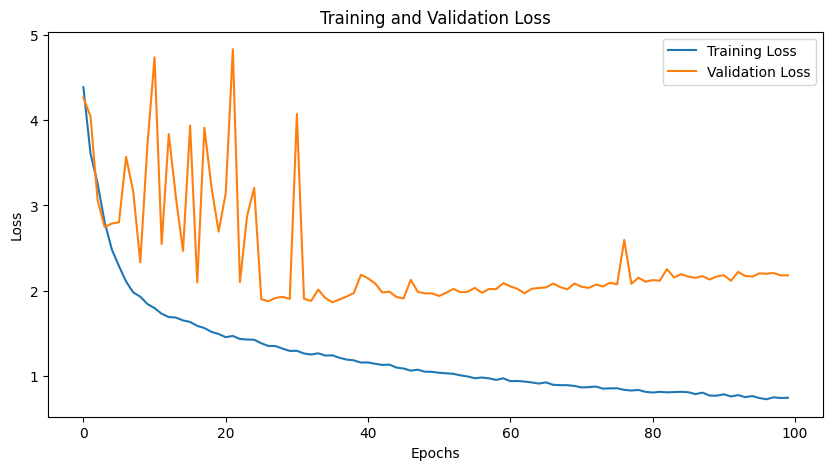

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


## Mélange images Labels !

In [21]:
from classes.data.labeled_satellite_image import SegmentationLabeledSatelliteImage

Ok ici on a des objets qui fonct cohabiter image et son label (image + segmentation mask (RIL ou BDTOPO))
On pourra faire la même chose avec la detection ou l'optique patchs etc..(il nous faut des fonctions de représentation à chaque fois) 

- de superposition image et label
- et de mise cote à cote
- possibnilité de revenir à la géométrie à chaque fois


In [ ]:
#image.normalize()
image_labellisee = SegmentationLabeledSatelliteImage(image,label = mask, labeling_date = date, source = "BDTOPO")


10
10
10
10
10
10
4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


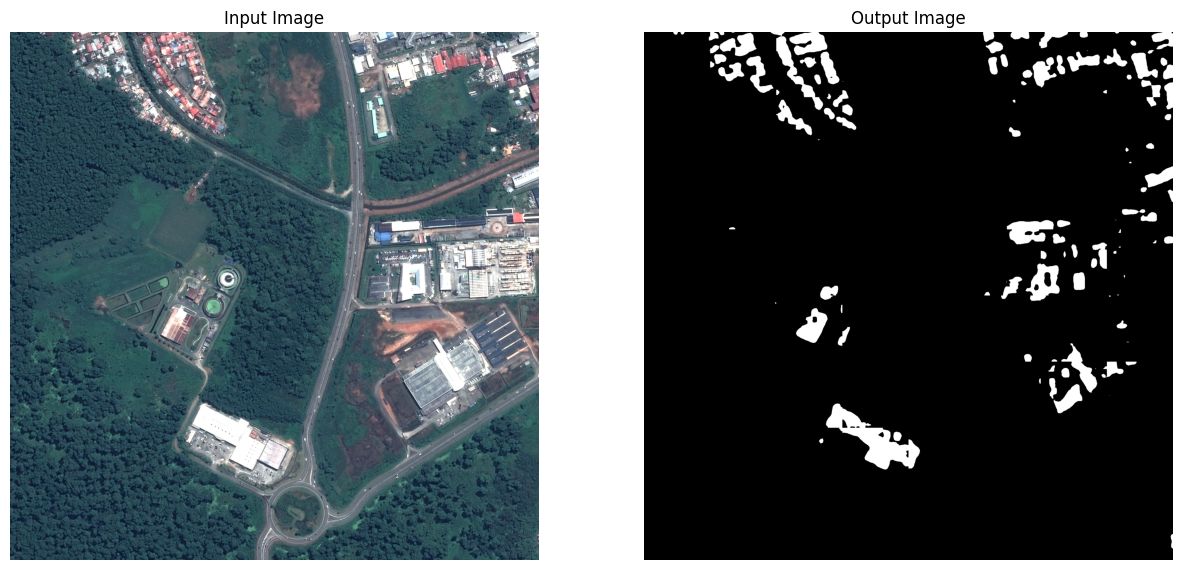

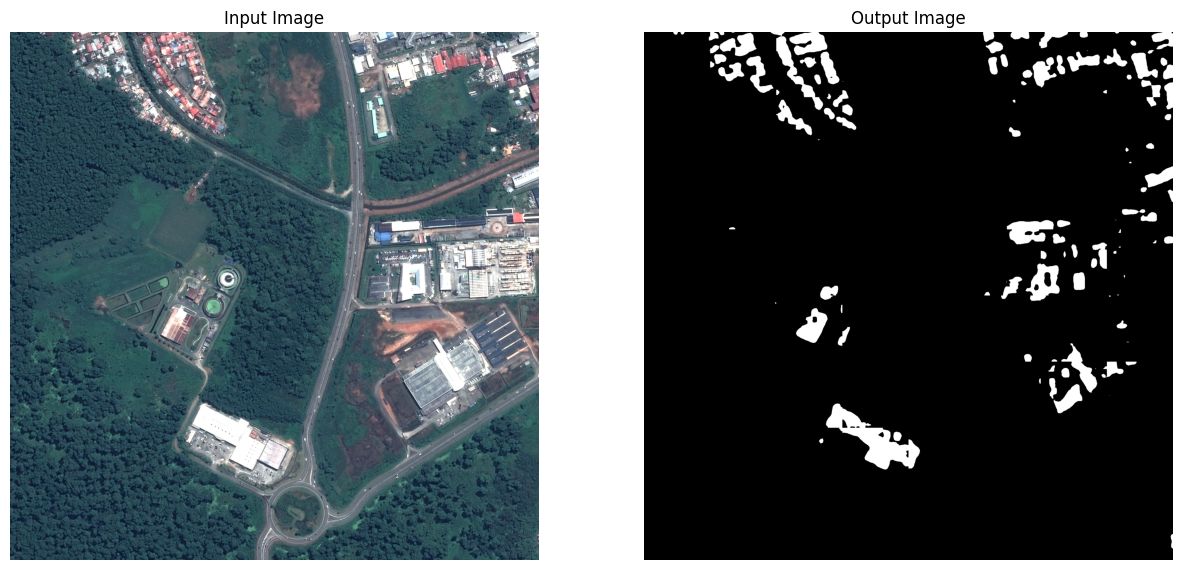

In [82]:
from utils.plot_utils import *

torch.save(model.state_dict(), 'model.pth')

# Load the model for testing
model = DeepLabv3Module(nchannel=3)
model.load_state_dict(torch.load('model.pth'))

# Put the model in evaluation mode
model.eval()

# Assume you have test data and corresponding labels
# test_data and test_labels
X_train3 = []
Y_train3 = []
image3= []
for im in liste_globale_image[124:125]: 
    
    images_split=im.split(250)
    for imm in images_split : 
        
        image3.append(imm)
        X_train3.append(imm.array)
        Y_train3.append(labeler_bdtopo_guy.create_segmentation_label(imm))

X_train3 = np.stack(X_train3)
y_train3 = np.stack(Y_train3)
# Create DataLoader for test data
images = X_train3  # shape : (num_samples, 3, height, width)
labels = y_train3  # shape : (num_samples, height, width)

# Normalisation and type conversion
images = images.astype(np.float32) / 255
labels = labels.astype(np.int64)

# Split the dataset into training and validation sets


# Convert to PyTorch tensors
X_train2 = torch.tensor(images)
y_train2 = torch.tensor(labels)

test_dataset = TensorDataset(X_train2, y_train2)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Create a dataset from the tensors



list_imlab = []
i=0
for data, target in test_loader:
    output = model(data)
    _, predicted_mask = torch.max(output, 1)

    # Move tensors back to the cpu for visualization with matplotlib
    predicted_mask = predicted_mask.detach().cpu().numpy()
    target = target.cpu().numpy()
    print(len(data))
    for sample_id in range(len(data)):
        list_imlab.append(SegmentationLabeledSatelliteImage(image3[sample_id+i],label = predicted_mask[sample_id], labeling_date = date, source = "BDTOPO"))
    i += len(data)


plot_list_segmentation_labeled_satellite_image(list_imlab,[0,1,2])
        
        

        



64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


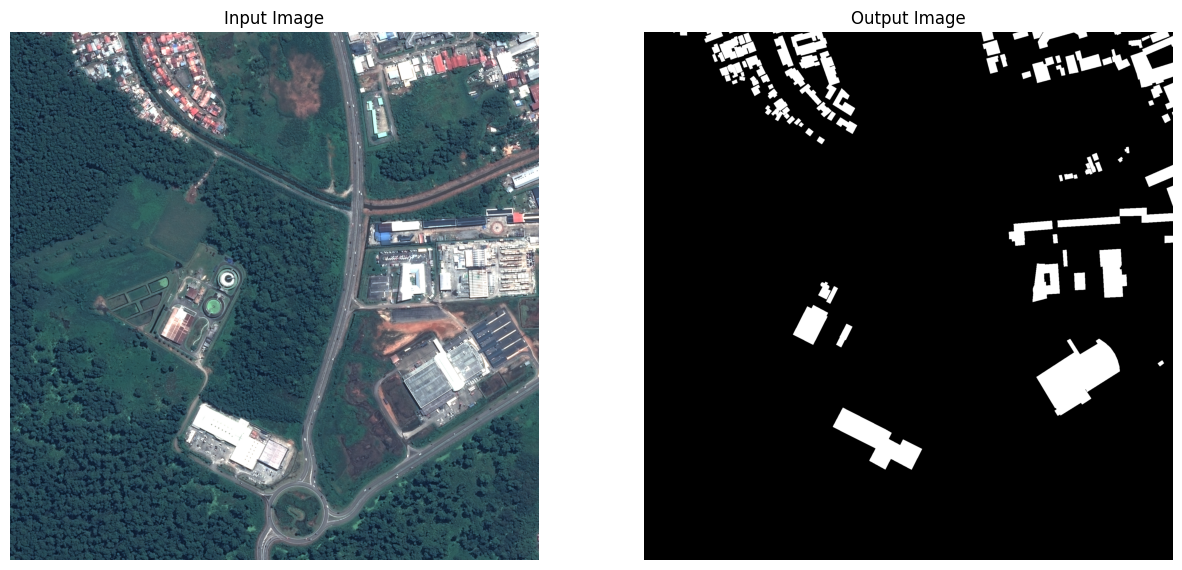

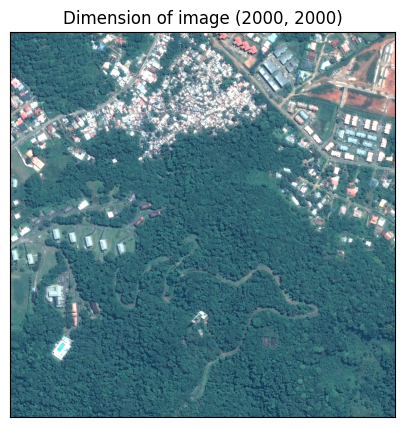

In [84]:
from utils.plot_utils import *
list_imlab2 = []
for im in liste_globale_image[124:125]: 
    im.normalize()
    images_split=im.split(250)
    for imm in images_split : 
        
            list_imlab2.append(SegmentationLabeledSatelliteImage(imm,label = labeler_bdtopo_guy.create_segmentation_label(imm), labeling_date = date, source = "BDTOPO"))
print(len(list_imlab2))
plot_list_segmentation_labeled_satellite_image(list_imlab2,[0,1,2])

liste_globale_image[24].plot([0,1,2])

## fonction split

In [ ]:
liste_image_labelisee = image_labellisee.split(250)
len(liste_image_labelisee)

## Plot liste image labellisée 

In [ ]:
SegmentationLabeledSatelliteImage.plot_list_segmentation_labeled_satellite_image(liste_image_labelisee,[0,1,2])

## Plot les masques de détection

## TO DO 
- Vérifier si ma fonction plot list images s'adapte à la,liste d'image globale
- création d'une classe Dataset particulière 
- comment créer un DataSet à partir des images originales ? utiliser des fonctions split successives, stacker etc..mais on ne va pas tout garder en mémoire.. création de nouveaux fichiers image ? ou bien technique 2 splitter et sélectionner aléatoirement une ou plusieur zones dans l'image ? -> voir avec les gars
- Faire une fonction create bounding box pour yolo etc.. c'est l'objet de create detection label , faire une fonction de représentation ?
- access Vault ? -W> dans projet slums detection bidonvilles
- Faire un notebook de prise en main pour les stagiaires -> en cours
- faire une fonction plot label on images (superposition)
- faire une fonction plot label next to image -> done
- faire une fonction plot liste image -> done
- fair eune fonction plot list of label images
- faire une fonction qui a partir d'un masque de segmentation donné sors les polygones associés (revenir sur rasterio ?)
- Pour les datasets, les classes faire une classe généralsite Dataset Segmentation et détection et patchs
- et faire plusieurs types de dataset segmentation dépendant du jeu de données et la stratégie de chargement
- ppour les modèles il faudra faire une surclasse modeles segment ation/detection et créer des modèlmes ad hoc etc.. De telle sorte qu'un modèle de segmentation puisse s'appliquer sans douleur sur un dataset de segmentation